<a href="https://colab.research.google.com/github/Saswata020/-Sentiment-Analysis-of-Mobile-phone-reviews/blob/main/NLP_product_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**
As the digital era evolves the online shopping has seen tremendous growth.Every Business person wants to analyze what their customers are talking about their products. The reviews, star-rating are the accessories of the product which describes the customers engagement. The process of analyzing the customer feelings is said to Sentiment Analysis.

# **Objective:**

 customer reviews for 10 mobile phones listed on Amazon and perform Sentiment Analysis for the customer reviews.

## Importing essential libraries:

In [ ]:
#Import the Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/NLP SDG/product/Amazon_Unlocked_Mobile.csv"
reviews_df = pd.read_csv(path)
reviews_df.head(2)
# Dataset is now stored in a Pandas Dataframe

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0


In [ ]:
#copy of dataset
data = reviews_df.copy()
#Summary of the data
data.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [ ]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [ ]:
#Null value checking in reviews
data['Reviews'].isnull().values.any()


True

In [ ]:
#Droping null values 
data = data[data['Reviews'].notna()]
data['Reviews'].isnull().values.any()


False

In [ ]:
#Checking null values in rating
data['Rating'].isnull().values.any()

False

In [ ]:
#dataframe with reviews and rating
df=data[['Reviews','Rating']]
df

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4
...,...,...
413835,another great deal great price,5
413836,Ok,3
413837,Passes every drop test onto porcelain tile!,5
413838,I returned it because it did not meet my needs...,3


# Exploratory Data Analysis

In [ ]:
#proportion of different ratings
df['Rating'].value_counts()

5    223580
1     72337
4     61374
3     31763
2     24724
Name: Rating, dtype: int64

# Data Visualization

Text(0, 0.5, 'Count')

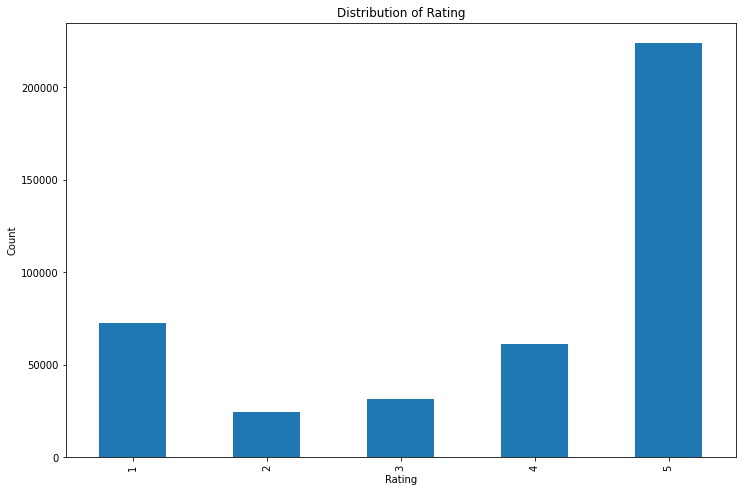

In [ ]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

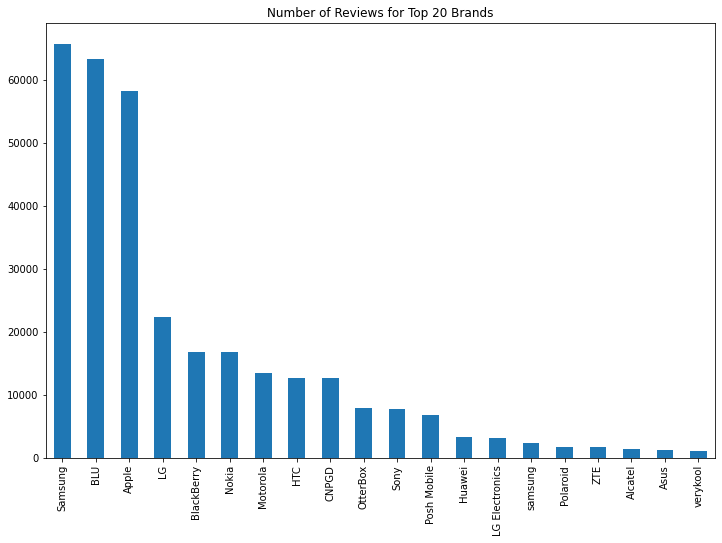

In [ ]:
# Plot number of reviews for top 20 brands
brands = reviews_df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

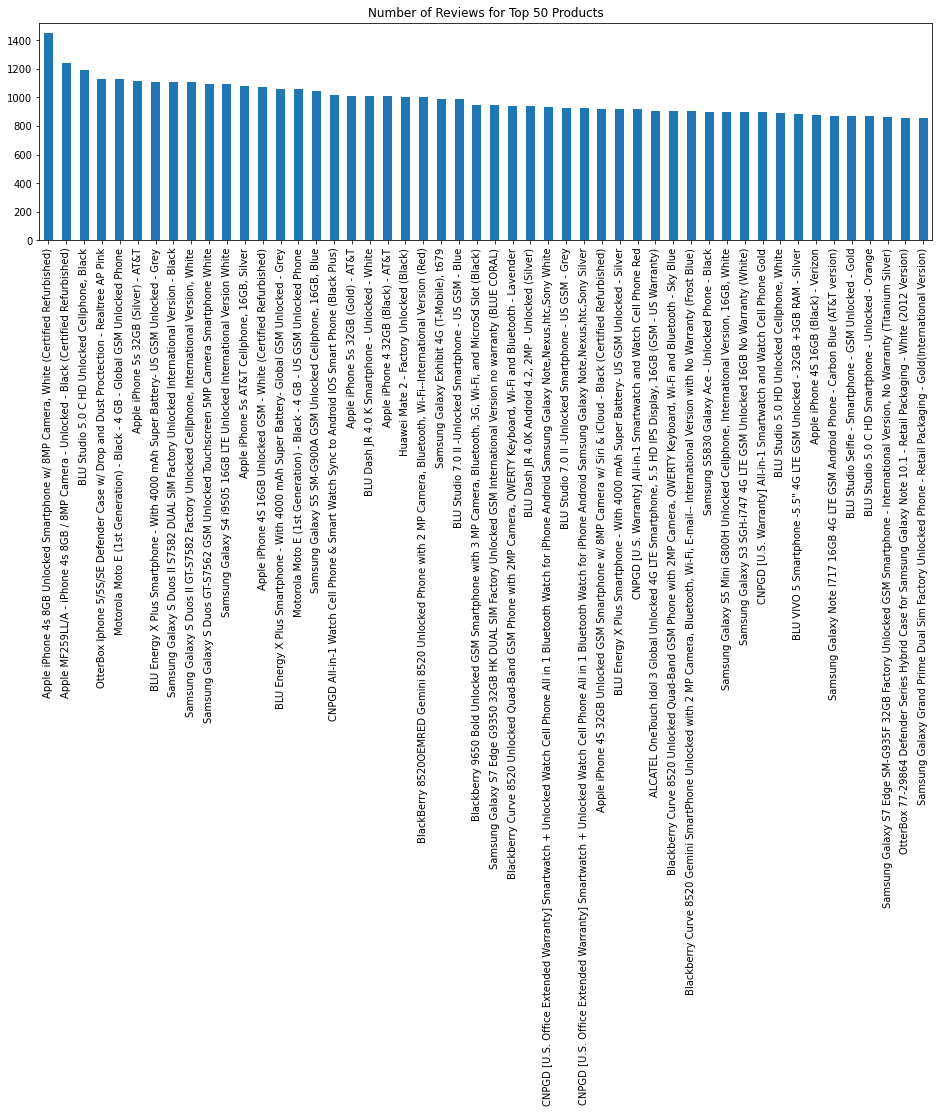

In [ ]:
# Plot number of reviews for top 50 products
products = reviews_df["Product Name"].value_counts()
plt.figure(figsize=(16,4))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0, 0.5, 'Count')

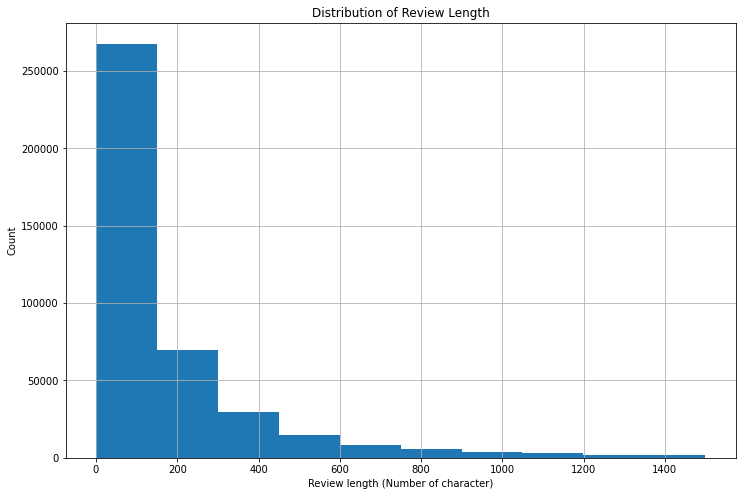

In [ ]:
# Plot distribution of review length
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

# Data Preprocessing

In [ ]:
df['Rating']=df['Rating'].astype(int) #convert the star_rating column to int

df['label']=np.where(df['Rating']>=4,1,0) #1-Positve,0-Negative

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Dataframe content
df.head(2)

,Reviews,Rating,label
0,I feel so LUCKY to have found this used (phone...,5,1
1,"nice phone, nice up grade from my pantach revu...",4,1


In [ ]:
df['label'].value_counts()

1    284954
0    128824
Name: label, dtype: int64

In [ ]:
#Taking balanced dataset
df = df.sample(frac=1).reset_index(drop=True) #shuffle
data=df[df['label']==0][:50000]
data=data.append(df[df['label']==1][:50000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data

0    50000
1    50000
Name: label, dtype: int64

,Reviews,Rating,label
0,"GPS is broken. Tried calibration, tried reboot...",1,0
1,It stop working,1,0
2,"It's a good cell. I sold to one of my friends,...",3,0
3,I ordered a new phone and they sent me a re-fu...,1,0
4,Hard time syncing to my phone,3,0
...,...,...,...
99995,The best phone ever made,5,1
99996,"Great phone for the price, nice camera and it ...",4,1
99997,I ordered this phone for my wife with some res...,4,1
99998,excellent,5,1


In [ ]:
#lower case and spling process
data['pre_process'] = data['Reviews'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [ ]:
#re - provides functions to pre process the strings as per the given regular expression
import re
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(r'http\S+', '', x))


In [ ]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\’t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", "are", s)
 s = re.sub(r"\'s", "is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\t", " not", s)
 s = re.sub(r"\'ve", "have", s)
 s = re.sub(r"\'m", "am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))


In [ ]:
#download all from  nltk library
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

* nltk — Natural Language Toolkit is a collection of libraries for natural language processing.
* stopwords — A collection of words that don’t provide any meaning to a sentence.
* WordNetLemmatizer — It is used to convert different forms of words into a single item but still keeping the context intact.

In [ ]:
data['pre_process']=data['pre_process'].apply(lambda x: ' '.join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop]))

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
data

,Reviews,Rating,label,pre_process
0,"GPS is broken. Tried calibration, tried reboot...",1,0,gps broken tried calibration tried reboots gps...
1,It stop working,1,0,stop working
2,"It's a good cell. I sold to one of my friends,...",3,0,itis good cell sold one friend love phoneif li...
3,I ordered a new phone and they sent me a re-fu...,1,0,ordered new phone sent refurbished onethe ring...
4,Hard time syncing to my phone,3,0,hard time syncing phone
...,...,...,...,...
99995,The best phone ever made,5,1,best phone ever made
99996,"Great phone for the price, nice camera and it ...",4,1,great phone price nice camera run smooth gb ram
99997,I ordered this phone for my wife with some res...,4,1,ordered phone wife reservation besides initial...
99998,excellent,5,1,excellent


# Word Cloud

* Now, we will create a Word Cloud. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as 
compared to less frequent words.

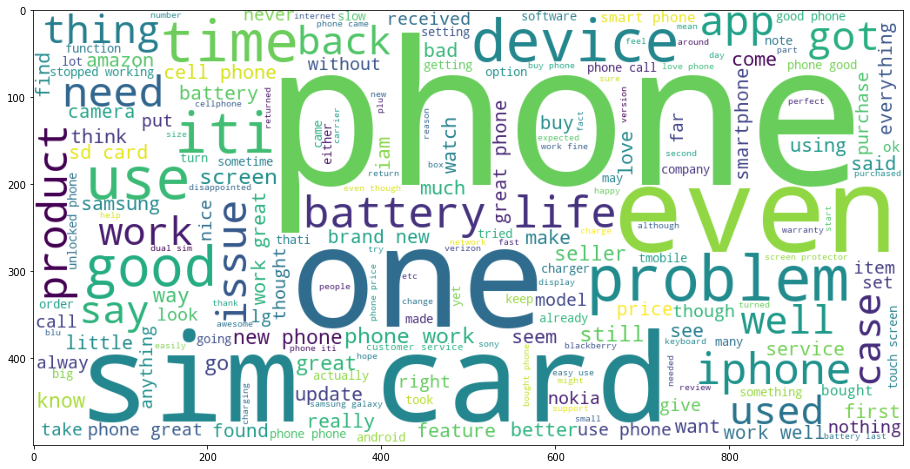

In [ ]:
from wordcloud import WordCloud
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in data['pre_process']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

# Spilt Train And Test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.3, random_state=30)
print('Train: ',X_train.shape,Y_train.shape,'Test: ',(X_test.shape,Y_test.shape))

Train:  (70000,) (70000,) Test:  ((30000,), (30000,))


# Text Transformation

In [ ]:
print('TFIDF Vectorizer……')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
#print(tf_x_train)
tf_x_test = vectorizer.transform(X_test)
#print(tf_x_test)

TFIDF Vectorizer……


# Cross Validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearSVC()
# evaluate model
scores = cross_val_score(model, tf_x_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.887 (0.004)


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, tf_x_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.882 (0.003)


# Support Vector machine

In [ ]:

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [ ]:
#fit the data
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [ ]:
y_test_pred=clf.predict(tf_x_test)

# Evaluation

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'f1-score': 0.8910695468914647,
  'precision': 0.8835629856984262,
  'recall': 0.8987047492527399,
  'support': 15055},
 '1': {'f1-score': 0.8883639308855291,
  'precision': 0.8961666780145707,
  'recall': 0.8806958849113415,
  'support': 14945},
 'accuracy': 0.8897333333333334,
 'macro avg': {'f1-score': 0.8897167388884969,
  'precision': 0.8898648318564985,
  'recall': 0.8897003170820408,
  'support': 30000},
 'weighted avg': {'f1-score': 0.8897216991845077,
  'precision': 0.8898417250872521,
  'recall': 0.8897333333333334,
  'support': 30000}}

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,solver='saga')


In [ ]:
logreg.fit(tf_x_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
y_test_pred=logreg.predict(tf_x_test)

# Evaluation

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'f1-score': 0.886208704771893,
  'precision': 0.8746846089150546,
  'recall': 0.898040518100299,
  'support': 15055},
 '1': {'f1-score': 0.8822571893651655,
  'precision': 0.8944509385958881,
  'recall': 0.8703914352626296,
  'support': 14945},
 'accuracy': 0.8842666666666666,
 'macro avg': {'f1-score': 0.8842329470685293,
  'precision': 0.8845677737554714,
  'recall': 0.8842159766814643,
  'support': 30000},
 'weighted avg': {'f1-score': 0.8842401915134416,
  'precision': 0.8845315354843898,
  'recall': 0.8842666666666666,
  'support': 30000}}

# Predict for Custom Input

In [ ]:
def text_transformation(input):
    corpus = []
    for item in input:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lemmatizer.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")


In [ ]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = vectorizer.transform(input)
    prediction = logreg.predict(transformed_input)
    expression_check(prediction)

In [ ]:
input1 = ["mobile is  new "]
input2 = ["battery has an issue"]

In [ ]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
